In [1]:
%matplotlib inline
import glob, os, sys, timeit
import matplotlib
import numpy as np

#sys.path.append('../')
from pyqsofit.PyQSOFit import QSOFit
from astropy.io import fits,ascii
from astropy.table import Table
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

#QSOFit.set_mpl_style()

In [82]:
multiAGNpath="/disk/bifrost/yuanze/multiAGN"
psname1="UGC"
psname2="2369"
obj=3
instru="OSIRIS_K"
stab = ascii.read(multiAGNpath+"/sources.list",format="ipac")
field=psname1+psname2
sentry = stab[stab["Field"]==field]
RA=sentry["RA"].value#[43.507814008,43.507573386,43.50724857]
Dec=sentry["Dec"].value#[14.9700775,14.9708075,14.97041556]
datapath=os.path.join(multiAGNpath,psname1+psname2)
z = sentry["z_sys"][obj-1]
path_ex = datapath #os.path.join(pyqsofit.__path__[0], '..', 'example')


path_out = os.path.join(datapath, '{}_1D'.format(instru.split("_")[0]))


# Requried
data = np.loadtxt(os.path.join(path_out, "{}_nuclear_spec_obj{}.txt".format(instru.split("_")[0],obj)))
lam = data[:,0]*10  # OBS wavelength [A]
flux = data[:,1]*1e17  # OBS flux [1e-17 erg/s/cm^2/A]
err = np.genfromtxt(datapath+"/OSIRIS/sigma_array.txt")*1e17  # 1 sigma error


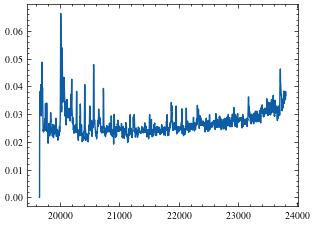

In [95]:
plt.plot(lam,err)

In [83]:

# create FITS file containing fitting parameter setup 
hdr0 = fits.Header()
hdr0['Author'] = 'Yuanze Ding'
primary_hdu = fits.PrimaryHDU(header=hdr0)

"""
In this table, we specify the priors / initial conditions and boundaries for the line fitting parameters.
"""

line_priors = np.rec.array([
    #(21661.21, 'Brg', 21000, 22100, 'Brg_br', 2, 0.0, 0.0, 1e10, 5e-3, 4e-4, 0.05, 0.015, 0, 0, 0, 0.05, 1),
    #(6549.85, 'Ha', 6400, 6800, 'NII6549_br', 2, 0.0, 0.0, 1e10, 5e-3, 4e-4, 0.05, 0.015, 0, 0, 0, 0.05, 1),
    #(6585.28, 'Ha', 6400, 6800, 'NII6585_br', 2, 0.0, 0.0, 1e10, 5e-3, 4e-4, 0.05, 0.015, 0, 0, 0, 0.05, 1),
    (19450.9, 'Brd', 19400, 23000, 'Brd_na', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-7, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    (21661.21, 'Brg', 19400, 23000, 'Brg_na', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-7, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    (21661.21, 'Brg', 19400, 23000, 'Brg_naw', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-7, 0.00169, 0.01, 2, 0, 0, 0.002, 1),
    (19576.00, 'Brg', 19400, 23000, 'H2_10_S3', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-7, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    (20338.00, 'Brg', 19400, 23000, 'H2_10_S2', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-7, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    (21218.00, 'Brg', 19400, 23000, 'H2_10_S1', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-7, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    (22235.00, 'Brg', 19400, 23000, 'H2_10_S0', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-7, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    (22477.00, 'Brg', 19400, 23000, 'H2_21_S1', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-7, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    (20735.00, 'Brg', 19400, 23000, 'H2_21_S3', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-7, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    #(19640.21, 'Brg', 21000, 22100, 'SiVI_br', 2, 0.0, 0.0, 1e10, 5e-3, 4e-4, 0.05, 0.015, 0, 0, 0, 0.05, 1),
    (19640.00, 'Brg', 19400, 23000, 'SiVI', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-7, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    (20586.90, 'Brg', 19400, 23000, 'HeI', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-7, 0.00169, 0.01, 1, 1, 0, 0.002, 1),
    #(19640.00, 'Brg', 19500, 22000, 'SiVI_w', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-6, 0.00169, 0.01, 0, 0, 0, 0.002, 1)
    
    #(21661.21, 'Brg', 21000, 22100, 'Brg_naw', 1, 0.0, 0.0, 1e10, 1e-3, 2.3e-6, 0.00169, 5e-3, 0, 0, 0, 0.001, 1),
    ],


    formats='float32,    a20,  float32, float32,      a20,  int32, float32, float32, float32, float32, float32, float32, float32,   int32,  int32,  int32, float32, int32',
    names=' lambda, compname,   minwav,  maxwav, linename, ngauss,  inisca,  minsca,  maxsca,  inisig,  minsig,  maxsig,    voff,  vindex, windex, findex,  fvalue,  vary')

# Header
hdr1 = fits.Header()
hdr1['lambda'] = 'Vacuum Wavelength in Ang'
hdr1['minwav'] = 'Lower complex fitting wavelength range'
hdr1['maxwav'] = 'Upper complex fitting wavelength range'
hdr1['ngauss'] = 'Number of Gaussians for the line'

# Can be set to negative for absorption lines if you want
hdr1['inisca'] = 'Initial guess of line scale [flux]'
hdr1['minsca'] = 'Lower range of line scale [flux]'
hdr1['maxsca'] = 'Upper range of line scale [flux]'

hdr1['inisig'] = 'Initial guess of linesigma [lnlambda]'
hdr1['minsig'] = 'Lower range of line sigma [lnlambda]'
hdr1['maxsig'] = 'Upper range of line sigma [lnlambda]'

hdr1['voff  '] = 'Limits on velocity offset from the central wavelength [lnlambda]'
hdr1['vindex'] = 'Entries w/ same NONZERO vindex constrained to have same velocity'
hdr1['windex'] = 'Entries w/ same NONZERO windex constrained to have same width'
hdr1['findex'] = 'Entries w/ same NONZERO findex have constrained flux ratios'
hdr1['fvalue'] = 'Relative scale factor for entries w/ same findex'

hdr1['vary'] = 'Whether or not to vary the parameter (set to 0 to fix the line parameter to initial values)'

# Save line info
hdu1 = fits.BinTableHDU(data=line_priors, header=hdr1, name='line_priors')

"""
In this table, we specify the windows and priors / initial conditions and boundaries for the continuum fitting parameters.
"""

conti_windows = np.rec.array([
 # Continuum fitting windows (to avoid emission line, etc.)  [AA]
    (19700.,20250.),
    (20756.,21193.),
    (21700.,22200.)
    ], 
    formats = 'float32,  float32',
    names =    'min,     max')

hdu2 = fits.BinTableHDU(data=conti_windows, name='conti_windows')

conti_priors = np.rec.array([
    ('Fe_uv_norm',  0.0,   0.0,   1e10,  0), # Normalization of the MgII Fe template [flux]
    ('Fe_uv_FWHM',  3000,  1200,  18000, 0), # FWHM of the MgII Fe template [AA]
    ('Fe_uv_shift', 0.0,   -0.01, 0.01,  0), # Wavelength shift of the MgII Fe template [lnlambda]
    ('Fe_op_norm',  0.0,   0.0,   1e10,  0), # Normalization of the Hbeta/Halpha Fe template [flux]
    ('Fe_op_FWHM',  3000,  1200,  18000, 0), # FWHM of the Hbeta/Halpha Fe template [AA]
    ('Fe_op_shift', 0.0,   -0.01, 0.01,  0), # Wavelength shift of the Hbeta/Halpha Fe template [lnlambda]
    ('PL_norm',     0.0,   0.0,   1e10,  0), # Normalization of the power-law (PL) continuum f_lambda = (lambda/3000)^-alpha
    ('PL_slope',    -1.5,  -5.0,  3.0,   0), # Slope of the power-law (PL) continuum
    ('Blamer_norm', 0.0,   0.0,   1e10,  0), # Normalization of the Balmer continuum at < 3646 AA [flux] (Dietrich et al. 2002)
    ('Balmer_Te',   15000, 10000, 50000, 0), # Te of the Balmer continuum at < 3646 AA [K?]
    ('Balmer_Tau',  0.0,   0.1,   2.0,   0), # Tau of the Balmer continuum at < 3646 AA
    ('conti_a_0',   0.0,   None,  None,  1), # 1st coefficient of the polynomial continuum
    ('conti_a_1',   0.0,   None,  None,  1), # 2nd coefficient of the polynomial continuum
    ('conti_a_2',   0.0,   None,  None,  1), # 3rd coefficient of the polynomial continuum
    # Note: The min/max bounds on the conti_a_0 coefficients are ignored by the code,
    # so they can be determined automatically for numerical stability.
    ],

    formats = 'a20,  float32, float32, float32, int32',
    names = 'parname, initial,   min,     max,     vary')

hdr3 = fits.Header()
hdr3['ini'] = 'Initial guess of line scale [flux]'
hdr3['min'] = 'FWHM of the MgII Fe template'
hdr3['max'] = 'Wavelength shift of the MgII Fe template'

hdr3['vary'] = 'Whether or not to vary the parameter (set to 0 to fix the continuum parameter to initial values)'


hdu3 = fits.BinTableHDU(data=conti_priors, header=hdr3, name='conti_priors')

"""
In this table, we allow user to customized some key parameters in our result measurements.
"""

measure_info = Table(
    [
        [[20000,20900]],
        [[
            # [2240, 2650], 
            [20000, 20900]
        ]]
    ],
    names=([
        'cont_loc',
        'Fe_flux_range'
    ]),
    dtype=([
        'float32',
        'float32'
    ])
)
hdr4 = fits.Header()
hdr4['cont_loc'] = 'The wavelength of continuum luminosity in results'
hdr4['Fe_flux_range'] = 'Fe emission wavelength range calculated in results'

hdu4 = fits.BinTableHDU(data=measure_info, header=hdr4, name='measure_info')

hdu_list = fits.HDUList([primary_hdu, hdu1, hdu2, hdu3, hdu4])
hdu_list.writeto(os.path.join(path_ex, 'qsopar_obj{}_{}.fits'.format(obj,instru)), overwrite=True)

In [69]:
Table(line_priors)

lambda,compname,minwav,maxwav,linename,ngauss,inisca,minsca,maxsca,inisig,minsig,maxsig,voff,vindex,windex,findex,fvalue,vary
float32,bytes20,float32,float32,bytes20,int32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,float32,int32
19450.9,Brd,19400.0,23000.0,Brd_na,1,0.0,0.0,10000000000.0,0.001,2.3e-07,0.00169,0.01,1,1,0,0.002,1
21661.21,Brg,19400.0,23000.0,Brg_na,1,0.0,0.0,10000000000.0,0.001,2.3e-07,0.00169,0.01,1,1,0,0.002,1
21661.21,Brg,19400.0,23000.0,Brg_naw,1,0.0,0.0,10000000000.0,0.001,2.3e-07,0.00169,0.01,2,0,0,0.002,1
19576.0,Brg,19400.0,23000.0,H2_10_S3,1,0.0,0.0,10000000000.0,0.001,2.3e-07,0.00169,0.01,1,1,0,0.002,1
20338.0,Brg,19400.0,23000.0,H2_10_S2,1,0.0,0.0,10000000000.0,0.001,2.3e-07,0.00169,0.01,1,1,0,0.002,1
21218.0,Brg,19400.0,23000.0,H2_10_S1,1,0.0,0.0,10000000000.0,0.001,2.3e-07,0.00169,0.01,1,1,0,0.002,1
22235.0,Brg,19400.0,23000.0,H2_10_S0,1,0.0,0.0,10000000000.0,0.001,2.3e-07,0.00169,0.01,1,1,0,0.002,1
22477.0,Brg,19400.0,23000.0,H2_21_S1,1,0.0,0.0,10000000000.0,0.001,2.3e-07,0.00169,0.01,1,1,0,0.002,1
20735.0,Brg,19400.0,23000.0,H2_21_S3,1,0.0,0.0,10000000000.0,0.001,2.3e-07,0.00169,0.01,1,1,0,0.002,1


Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
Balmer_Tau        0.1      0.1        2     None    False     None     None
Balmer_Te     1.5e+04    1e+04    5e+04     None    False     None     None
Blamer_norm         0        0    1e+10     None    False     None     None
Fe_op_FWHM       3000     1200  1.8e+04     None    False     None     None
Fe_op_norm          0        0    1e+10     None    False     None     None
Fe_op_shift         0    -0.01     0.01     None    False     None     None
Fe_uv_FWHM       3000     1200  1.8e+04     None    False     None     None
Fe_uv_norm          0        0    1e+10     None    False     None     None
Fe_uv_shift         0    -0.01     0.01     None    False     None     None
PL_norm             0        0    1e+10     None    False     None     None
PL_slope         -1.5       -5        3     None    False     None     None
conti_a_0           0     -inf      inf     None     True     None     None
conti_a_1 

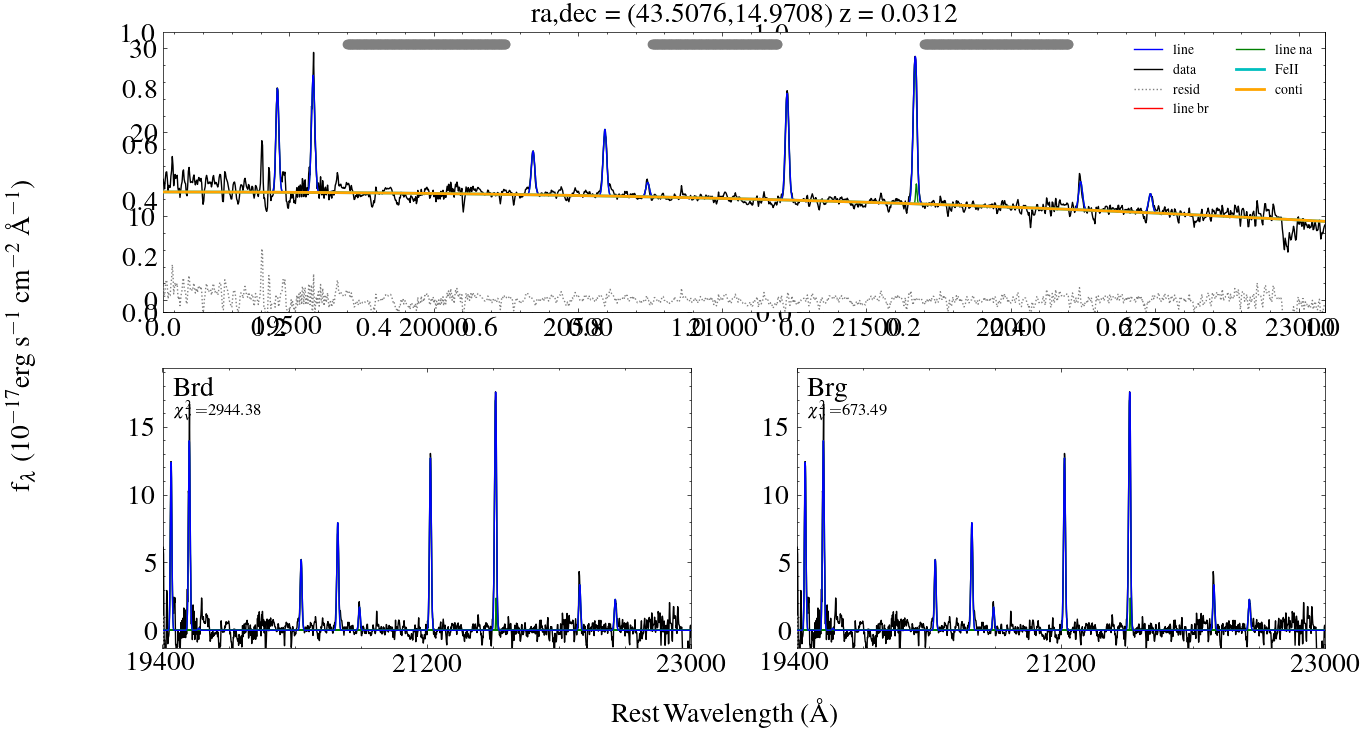

In [84]:
# Prepare data
q_mle = QSOFit(lam, flux, err, z, ra=RA[int(obj)-1], dec=Dec[int(obj)-1], path=path_ex)#plateid=plateid, mjd=mjd, fiberid=fiberid,ra=ra, dec=dec,

# Double check the installation path with the PCA / Fe template files
#print('install path:', q_mle.install_path)

# Change it if you installed them somewhere else
#q_mle.install_path = '...'

start = timeit.default_timer()
# Do the fitting

q_mle.Fit(name=None,  # customize the name of given targets. Default: plate-mjd-fiber
          # prepocessing parameters
          nsmooth=1,  # do n-pixel smoothing to the raw input flux and err spectra
          and_mask=False,  # delete the and masked pixels
          or_mask=False,  # delete the or masked pixels
          reject_badpix=False,  # reject 10 most possible outliers by the test of pointDistGESD
          deredden=True,  # correct the Galactic extinction
          wave_range=None,  # trim input wavelength
          wave_mask=None,  # 2-D array, mask the given range(s)

          # host decomposition parameters
          decompose_host=False,  # If True, the host galaxy-QSO decomposition will be applied
          host_prior=False, # If True, the code will adopt prior-informed method to assist decomposition. Currently, only 'CZBIN1' and 'DZBIN1' model for QSO PCA are available. And the model for galaxy must be PCA too.
          host_prior_scale=0.2, # scale of prior panelty. Usually, 0.2 works fine for SDSS spectra. Adjust it smaller if you find the prior affect the fitting results too much.

          host_line_mask=False, # If True, the line region of galaxy will be masked when subtracted from original spectra.
          decomp_na_mask=False, # If True, the narrow line region will be masked when perform decomposition
          qso_type='CZBIN1', # PCA template name for quasar
          npca_qso=10, # numebr of quasar templates
          host_type='PCA', # template name for galaxy
          npca_gal=5, # number of galaxy templates
          
          # continuum model fit parameters
          Fe_uv_op=False,  # If True, fit continuum with UV and optical FeII template
          poly=True,  # If True, fit continuum with the polynomial component to account for the dust reddening
          BC=False,  # If True, fit continuum with Balmer continua from 1000 to 3646A
          initial_guess=None,  # Initial parameters for continuum model, read the annotation of this function for detail
          rej_abs_conti=False,  # If True, it will iterately reject 3 sigma outlier absorption pixels in the continuum
          n_pix_min_conti=100,  # Minimum number of negative pixels for host continuuum fit to be rejected.

          # emission line fit parameters
          linefit=True,  # If True, the emission line will be fitted
          rej_abs_line=False,
          # If True, it will iterately reject 3 sigma outlier absorption pixels in the emission lines

          # fitting method selection
          MC=False,
          # If True, do Monte Carlo resampling of the spectrum based on the input error array to produce the MC error array
          MCMC=False,
          # If True, do Markov Chain Monte Carlo sampling of the posterior probability densities to produce the error array
          nsamp=2000,
          # The number of trials of the MC process (if MC=True) or number samples to run MCMC chain (if MCMC=True)

          # advanced fitting parameters
          param_file_name='qsopar_obj{}_{}.fits'.format(obj,instru),  # Name of the qso fitting parameter FITS file.
          nburn=200,  # The number of burn-in samples to run MCMC chain
          nthin=10,  # To set the MCMC chain returns every n samples
          epsilon_jitter=0.,
          # Initial jitter for every initial guass to avoid local minimum. (Under test, not recommanded to change)

          # customize the results
          save_result=False,  # If True, all the fitting results will be saved to a fits file
          save_fits_name=None,  # The output name of the result fits
          save_fits_path=path_out,  # The output path of the result fits
          plot_fig=True,  # If True, the fitting results will be plotted
          save_fig=False,  # If True, the figure will be saved
          plot_corner=True,  # Whether or not to plot the corner plot results if MCMC=True

          # debugging mode
          verbose=True,  # turn on (True) or off (False) debugging output

          # sublevel parameters for figure plot and emcee
          kwargs_plot={
              'save_fig_path': '.',  # The output path of the figure
              'broad_fwhm'   : 1200  # km/s, lower limit that code decide if a line component belongs to broad component
          },
          kwargs_conti_emcee={},
          kwargs_line_emcee={})

end = timeit.default_timer()

print(f'Fitting finished in {np.round(end - start, 1)}s')

In [85]:
import pandas as pd
#print(q_mcmc.line_result_name)
#print('')
#print(q_mcmc.line_result)
q=q_mle
line_result=pd.DataFrame({"value":q.line_result},index=q.line_result_name)
print(line_result)

                                        value
1_complex_name                            Brd
1_line_status                               1
1_line_min_chi2             4363574.177050065
1_line_bic                 11880.573020713196
1_line_red_chi2            2944.3820357962654
1_niter                                    62
1_ndof                                   1482
2_complex_name                            Brg
2_line_status                               1
2_line_min_chi2             990707.0585297742
2_line_bic                  9759.205493703872
2_line_red_chi2             673.4922219780926
2_niter                                   373
2_ndof                                   1471
Brd_na_1_scale             12.390032888554003
Brd_na_1_centerwave          9.87604926168272
Brd_na_1_sigma         0.00026654742319492665
Brg_na_1_scale             16.966303917342884
Brg_na_1_centerwave          9.98361435963109
Brg_na_1_sigma          0.0002996771623725403
Brg_naw_1_scale             2.3907

result for obj3
H2_10_S0:
FWHM (km/s) 214.4
Sigma (km/s) 88.1
EW (A) 5.2
Peak (A) 22242.5
Area (10^(-17) erg/s/cm^2) 55.9

H2_10_S1:
FWHM (km/s) 214.4
Sigma (km/s) 88.1
EW (A) 16.9
Peak (A) 21225.1
Area (10^(-17) erg/s/cm^2) 201.4

H2_10_S2:
FWHM (km/s) 214.4
Sigma (km/s) 88.1
EW (A) 6.3
Peak (A) 20344.8
Area (10^(-17) erg/s/cm^2) 79.2

H2_10_S3:
FWHM (km/s) 214.4
Sigma (km/s) 88.1
EW (A) 15.9
Peak (A) 19582.6
Area (10^(-17) erg/s/cm^2) 204.5

H2_21_S1:
FWHM (km/s) 214.4
Sigma (km/s) 88.1
EW (A) 3.7
Peak (A) 22484.5
Area (10^(-17) erg/s/cm^2) 38.3

H2_21_S3:
FWHM (km/s) 214.4
Sigma (km/s) 88.1
EW (A) 2.2
Peak (A) 20742.0
Area (10^(-17) erg/s/cm^2) 26.6

HeI:
FWHM (km/s) 214.4
Sigma (km/s) 88.1
EW (A) 9.9
Peak (A) 20593.8
Area (10^(-17) erg/s/cm^2) 122.3

Brg_na:
FWHM (km/s) 214.4
Sigma (km/s) 88.1
EW (A) 23.9
Peak (A) 21668.5
Area (10^(-17) erg/s/cm^2) 274.9

Brd_na:
FWHM (km/s) 225.8
Sigma (km/s) 78.1
EW (A) 12.5
Peak (A) 19455.6
Area (10^(-17) erg/s/cm^2) 160.2

SiVI:
FWHM (km/s) 214

[Text(19000, 0, '1.9'),
 Text(19500, 0, '1.95'),
 Text(20000, 0, '2.0'),
 Text(20500, 0, '2.05'),
 Text(21000, 0, '2.1'),
 Text(21500, 0, '2.15'),
 Text(22000, 0, '2.2'),
 Text(22500, 0, '2.25')]

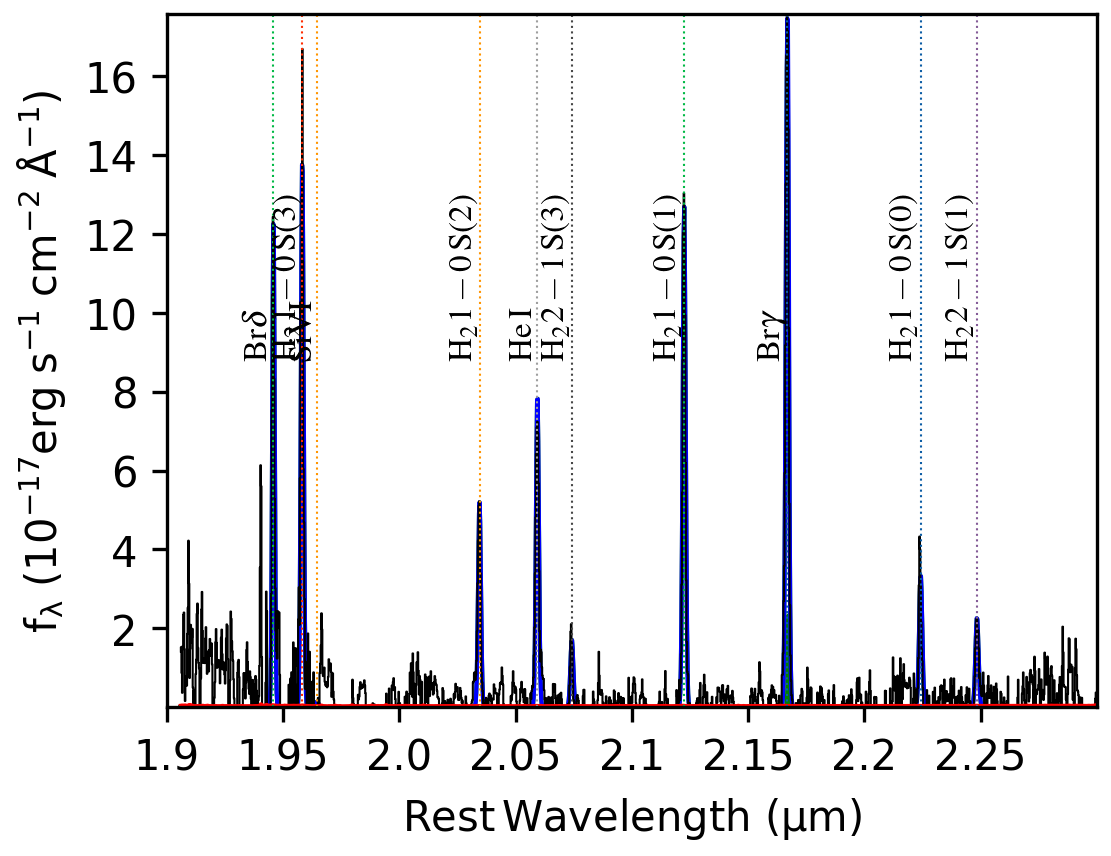

In [92]:
plt.rcdefaults()
import scienceplots

fig, ax = plt.subplots(1, 1,figsize=(4,3), dpi=300)
plt.style.use(["science"])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})

q=q_mle

if q.MCMC:
    gauss_result = q.gauss_result[::2]
else:
    gauss_result = q.gauss_result

# Plot individual line components
for p in range(int(len(gauss_result) / 3)):
    if q.CalFWHM(gauss_result[3 * p + 2]) < 1200:  # < 1200 km/s narrow
        color = 'g'  # narrow
    else:
        color = 'r'  # broad
    ax.plot(q.wave, q.Onegauss(np.log(q.wave), gauss_result[p * 3:(p + 1) * 3]), color=color)

# Plot total line model

ax.plot(q.wave, q.Manygauss(np.log(q.wave), gauss_result), 'b', lw=1)
ax.step(q.wave, q.line_flux, 'k',lw=0.5)
ax.plot(q.wave,q.err,"r")
xlow=19000
xhigh=23000
ax.set_xlim(xlow, xhigh)
yup=np.max(q.line_flux)
ax.set_ylim(1e-4,yup )
#ax.set_yscale("log")
ax.set_xlabel(r'$\rm Rest \, Wavelength$ ($\rm \mu m$)')
ax.set_ylabel(r'$\rm f_{\lambda}$ ($\rm 10^{-17} erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$)')
'''
Line properties
'''
print("result for obj{}".format(obj))
'''
from astropy import constants
from astropy import units as u
c=constants.c.to(u.km/u.s).value
#linename="OIII5007c"
#linename="Hb_na"
linename="H2_S1"
#lineshift=np.exp(float(line_result.loc["{}_1_centerwave".format(linename)]))-4862.68
lineshift=float(line_result.loc["{}_1_centerwave".format(linename)])
linec=np.exp(float(line_result.loc["{}_1_centerwave".format(linename)]))
#flinecerr=linec*float(line_result.loc["{}_1_centerwave_err".format(linename)]) #these are tied together

zf=1+z
zfpec = linec/4862.68

#vpec =  (linec/4862.68-1)*c                     # This is the fitted residual velocity in km/s
#dvpec = flinecerr/4862.68*c
#znew = (1 + z)*np.exp(vpec/c) - 1           # eq.(5c) Cappellari (2023)
znew = zf*zfpec-1
#dznew = (1 + znew)*dvpec/c              # eq.(5d) Cappellari (2023)
#dznew = znew*flinecerr/linec
print(f"line shift: {lineshift}")
print(f"velocity shift of {linename:s}: {vpec:#.6f}") #+/- {dvpec:#.2g}")
print(f"Old redshift z = {z:#.6f}")
print(f"Best-fitting redshift z = {znew:#.6f}")# +/- {dznew:#.2g}")
print("")

linename="H2_S2"
lineshift=float(line_result.loc["{}_1_centerwave".format(linename)])
linec=np.exp(float(line_result.loc["{}_1_centerwave".format(linename)]))
#flinecerr=linec*float(line_result.loc["{}_1_centerwave_err".format(linename)])

zfpec = linec/6564.61
#vpec =  (linec/6564.61-1)*c                     # This is the fitted residual velocity in km/s
#dvpec = flinecerr/6564.61*c
#znew = (1 + z)*np.exp(vpec/c) - 1           # eq.(5c) Cappellari (2023)
znew = zf*zfpec-1
#dznew = (1 + znew)*dvpec/c              # eq.(5d) Cappellari (2023)
#dznew = znew*flinecerr/linec
print(f"line shift: {lineshift}")
print(f"velocity shift of {linename:s}: {vpec:#.6f}") #+/- {dvpec:#.2g}")
print(f"Old redshift z = {z:#.6f}")
print(f"Best-fitting redshift z = {znew:#.6f}")# +/- {dznew:#.2g}")
print("")
'''
all_area={}
all_peaks={}
ln_to_print=['H2_10_S0','H2_10_S1','H2_10_S2','H2_10_S3','H2_21_S1','H2_21_S3','HeI','Brg_na','Brd_na','SiVI']
text=[r'H$_{2}1-0\,$S(0)',r'H$_{2}1-0\,$S(1)',r'H$_{2}1-0\,$S(2)',r'H$_{2}1-0\,$S(3)',r'H$_{2}2-1\,$S(1)','H$_{2}2-1\,$S(3)',r'He$\,$I',r'Br$\gamma$','Br$\delta$','SiVI']
for ind,ln in enumerate(ln_to_print):
    fwhm, sigma, ew, peak, area, snr = q.line_prop_from_name(ln, 'narrow')
    all_area[ln]=area
    all_peaks[ln]=peak
    print("{}:".format(ln))
    print("FWHM (km/s)", np.round(fwhm, 1))
    print("Sigma (km/s)", np.round(sigma, 1))
    print("EW (A)", np.round(ew, 1))
    print("Peak (A)", np.round(peak, 1))
    print("Area (10^(-17) erg/s/cm^2)", np.round(area, 1))
    print("")
    if peak < xhigh and peak > xlow:
        ax.axvline(peak,color="C{}".format(ind),lw=0.5,ls=":")
        ax.text(peak*0.997, 5e-1*yup,text[ind], rotation=90,verticalalignment='bottom',horizontalalignment='center',fontsize=8)

xticks=np.array([19000,19500,20000,20500,21000,21500,22000,22500])
ax.set_xticks(xticks)
ax.set_xticklabels(xticks/10000)
#ax.axvline(22235)
#fig.savefig(datapath+"/fig/OSIRIS_obj{}.pdf".format(obj))

In [97]:
np.log10(2e-17*2.5)

-16.30102999566398

In [87]:
print(r"H$_2$/Br$\gamma$",all_area['H2_10_S1']/all_area['Brg_na'])
#print("H_2/Br gamma",all_area['H2_10_S1']/all_area['Brg_na'])
#EBV=2.5/(0.43-0.36)*np.log10((all_area['Brg_na']/all_area['Brd_na']/1.4))
EBV=2.5/(Cex.k_lambda(x=[1.9450])-Cex.k_lambda(x=[2.1661]))*np.log10((all_area['Brg_na']/all_area['Brd_na']/1.51))
print(EBV)

H$_2$/Br$\gamma$ 0.7326414686179877
[0.95544545]


In [81]:
from dust_attenuation.averages import C00
from dust_extinction.parameter_averages import CCM89
C89=CCM89(Rv=4.05)
Cex=C00()
wave=[]
for key in all_peaks:
    if all_peaks[key]/10000 > 2.2:
        continue
    else:
        wave.append(all_peaks[key]/10000)
Alambda=Cex.k_lambda(x=wave)*EBV
print(Cex.k_lambda(x=[0.5500])*EBV)
print(C89(x=[1.9450]))

[4.68096872]
[1.06699131]


In [72]:
Cex.k_lambda(x=[1.9450])-Cex.k_lambda(x=[2.1661])

array([0.14512503])

In [89]:
print(Cex.k_lambda(x=[0.5500])*1.4)

[5.66704653]


In [74]:
Cex.k_lambda(x=[2.1661])

array([0.38889089])